# COGS 108 - EDA Checkpoint

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

# Setup

In [12]:
## YOUR CODE HERE
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import StripePattern

# Data Cleaning

Describe your data cleaning steps here.

In [13]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [14]:
url='https://drive.google.com/file/d/1k0LWtMKr388jRK73wyrfEhZgBPkzPrLz/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
# df.astype({'Stars': 'float'})
def star_converted(s):
    rating = s.split('/')[0]
    try:
        return float(rating)
    except ValueError:
        return None
df.Stars= df.Stars.apply(star_converted)

In [15]:
star_df = df.groupby('Country').mean().reset_index()

In [16]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
# world

In [30]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
country_shapes = f'{url}/world-countries.json'
geoJSON_df = gpd.read_file(country_shapes)
geoJSON_df = geoJSON_df.rename(columns = {"id":"country_code",'name':'Country'})
final_df = geoJSON_df.merge(star_df, on = "Country")
def get_lat_long(pt):
    '''
    Get centroid point of a state
    '''
    return (pt.y, pt.x)
final_df['coor'] = final_df['geometry'].centroid.apply(get_lat_long)
m = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='Ramen World',
    data=final_df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['Country', 'Stars'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    # nan_fill_color='white'
).add_to(m)

# nans = df[df["Stars"].isnull()]['POSTAL.CODE'].values
# gdf_nans = df[df['POSTAL.CODE'].isin(nans)]
sp = StripePattern(angle=45, color='grey', space_color='white')

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

# # Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    data = final_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Country','Stars',],
        aliases=['Country','Star rating',],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(NIL)
m.keep_in_front(NIL)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl(collapsed=True).add_to(m)
# # df
# outfp = "base_map.html"
# m.save(outfp)
m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]


The above map will look like below when you hover a country that does have average star rating

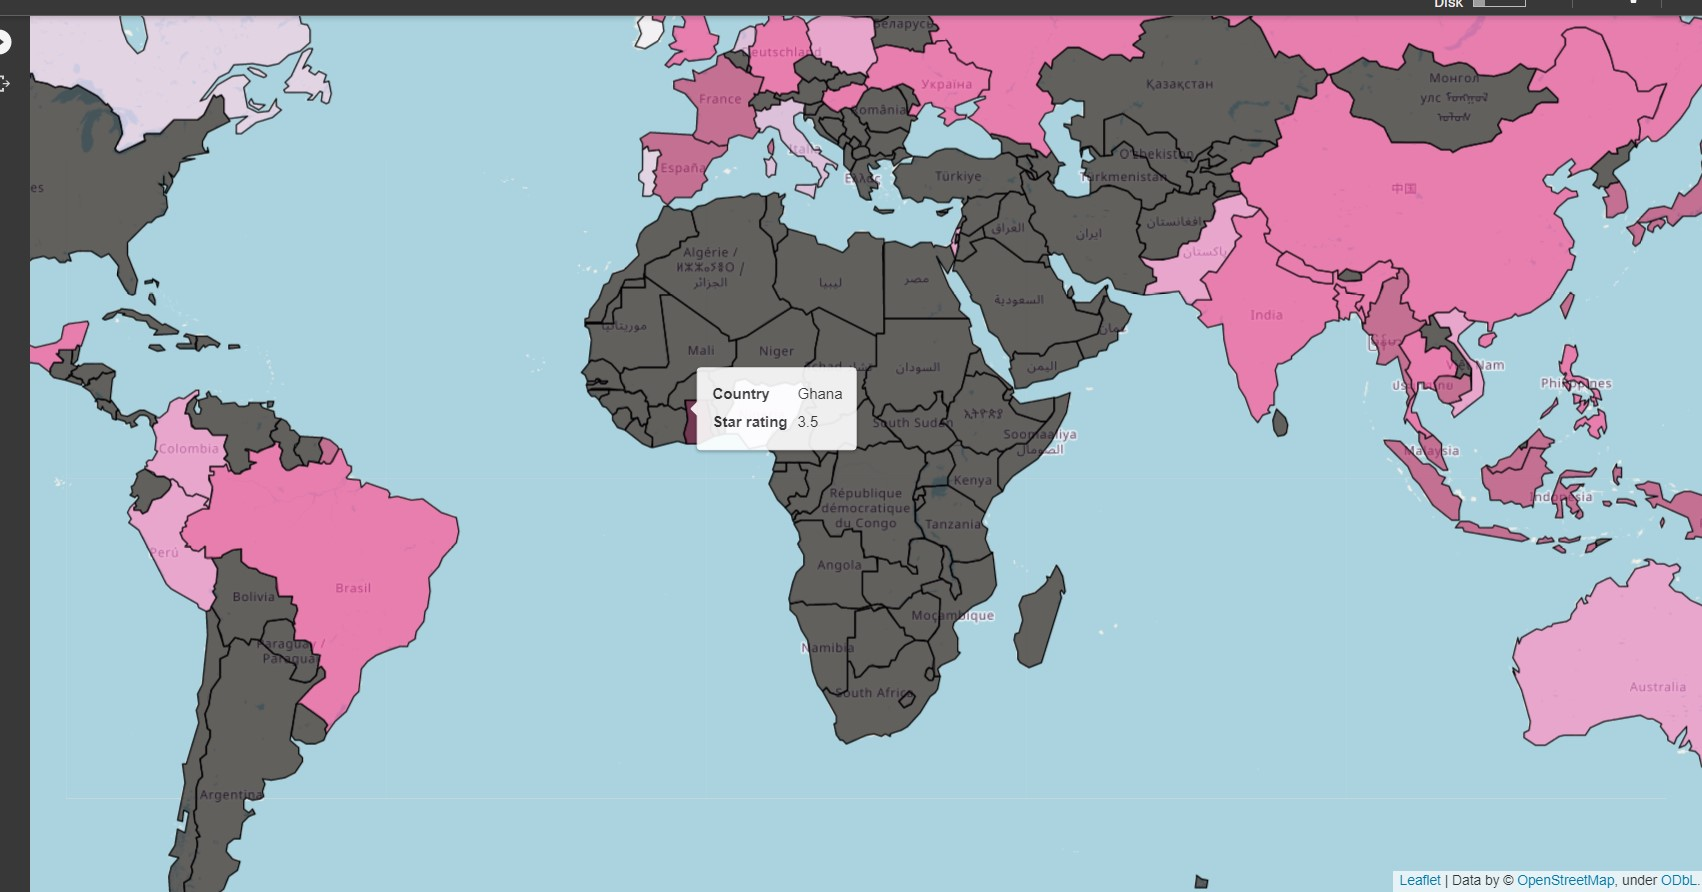

In [4]:
from IPython.display import Image
Image(filename='pictures/ghana.jpg') 

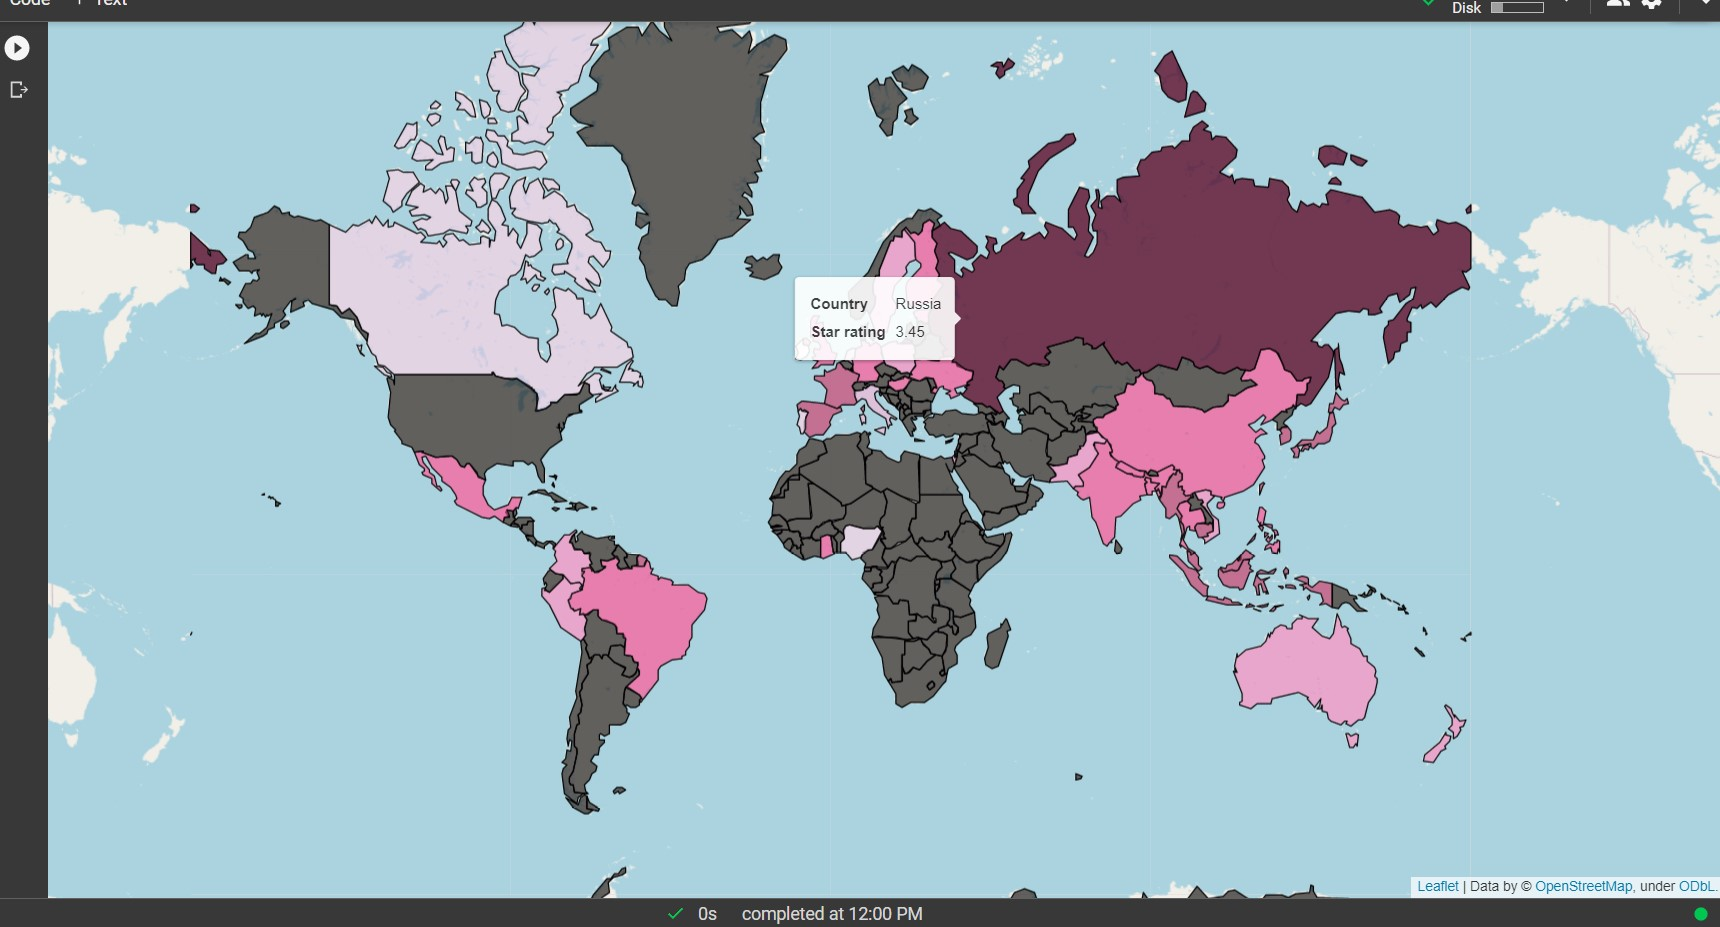

In [5]:
Image(filename='pictures/russia.jpg') 